In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pprint
from pprint import pprint as pprint
import collections
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker
from sqlalchemy.schema import Table, DropTable
import pandas as pd

In [2]:
Session = sessionmaker()
engine = create_engine('sqlite:///twitter.db')

In [6]:
users = pd.read_sql_query('SELECT user1.user_name AS user, COUNT(*) as number_of_retweets, \
                            user2.user_name AS retwitter \
                            FROM user AS user1 \
                             JOIN tweet ON tweet.user_id = user1.user_id \
                             JOIN retweet ON retweet.source_tweet_id = tweet.tweet_id \
                             JOIN user AS user2 ON retweet.user_id = user2.user_id \
                             WHERE DATE(tweet.tweet_created_at) < DATE("2018-11-10") \
                             GROUP BY user, retwitter', engine)
print(users[:10])

                                     user  number_of_retweets  \
0                                    None                   1   
1                       "We the People" 🏁                   1   
2  #Bangladesh News 24 (#BreakingNews 24)                   1   
3  #Bangladesh News 24 (#BreakingNews 24)                   1   
4                                #BearJew                   1   
5                      #BlueWave Thoughts                   1   
6                      #BlueWave Thoughts                   1   
7                      #BlueWave Thoughts                   1   
8                      #BlueWave Thoughts                   1   
9                      #BlueWave Thoughts                   1   

                            retwitter  
0                    #CANST/#GMNo🇺🇸🐸❌  
1                   marlene silva ⭐⭐⭐  
2      Save USA vote red ⭐️⭐️⭐️  🚂💨🇺🇸  
3                  The King Of Comedy  
4                    RestingWitchFace  
5                  #BlueWave Thoughts  
6   

In [7]:
G = nx.from_pandas_edgelist(users, 'user', 'retwitter', 'number_of_retweets')

In [8]:
# Get nodes with degree >= min_degree

min_degree = 100

nodes = [node for node, degree in G.degree() if degree >= min_degree]

In [40]:
pprint(nx.info(G))


('Name: \n'
 'Type: Graph\n'
 'Number of nodes: 59249\n'
 'Number of edges: 109994\n'
 'Average degree:   3.7129')


In [9]:

# Create a subgraph with nodes degree >= min_degree (in the G graph)

G_sampled = G.subgraph(nodes)
pprint(nx.info(G_sampled))


('Name: \n'
 'Type: Graph\n'
 'Number of nodes: 163\n'
 'Number of edges: 665\n'
 'Average degree:   8.1595')


In [10]:
def get_histogram(G):
    degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())

    fig, ax = plt.subplots()
    plt.bar(deg, cnt, width=0.80, color='b')

    plt.title("Degree Histogram")
    plt.ylabel("Count")
    plt.xlabel("Degree")
    ax.set_xticks([d + 0.4 for d in deg])
    ax.set_xticklabels(deg)

    plt.show()

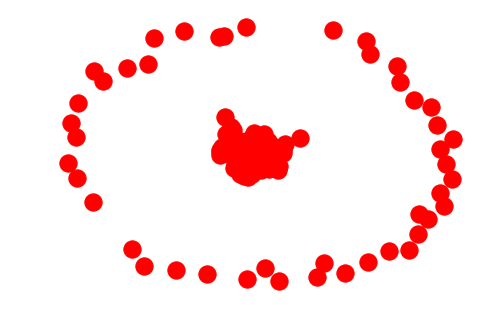

In [11]:
nx.draw(G_sampled, with_labels=False, edges=G_sampled.edges)
plt.show()

In [12]:
print("users", len(G_sampled.nodes))
print("connections",len(G_sampled.edges))

users 163
connections 665


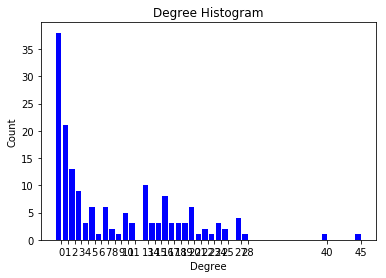

In [13]:
# avg_node_connectivity = nx.networkx.average_node_connectivity(G)
# print('Average node connectivity: ', avg_node_connectivity)

get_histogram(G_sampled)

In [14]:
from networkx.algorithms.community.centrality import girvan_newman
communities_iter = girvan_newman(G_sampled)

communities_sum = 0
communities_gn = []

for community_gn in next(communities_iter):
    communities_sum += 1
    communities_gn.append(community_gn)
    print("Community ", communities_sum)
    print(community_gn)
    print("Liczność community: ", len(community_gn), "\n")
    
print("Znaleziono communities: ", communities_sum)

Community  1
{'Oak-town ☢ Unfiltered / Vote Republican'}
Liczność community:  1 

Community  2
{'Alisande 🇺🇸', 'Robin 🇺🇸❤️🇺🇸', 'RW 😡', 'TRUMPERLAND🇺🇸', 'ＤａｒｋＧｒｅｙＧｈｏｓｔ🌹-K-', '@gary[WontBackDown]', 'The Columbia Bugle 🇺🇸', 'South Fl Dragonphoenix69', 'Loomered❤️Molly⭐️⭐️⭐️', 'Ed Krassenstein', 'Barb🏇ÓRothláin', 'Lambda Legal', 'Cody', 'Sektor (K)', 'DrLee MD is A NATIONALIST', 'Nationalist Drew 🇺🇸🏁🍻', 'Bill Mitchell', 'Sara', 'Ernie Plumley', '🇺🇸California Condor🇺🇸', 'GO RED STATE BY STATE', 'NTK Network', 'Mike', 'Sandpiper👑✝️✡️🐕🐈❤️', "Bernie's Breadcrumbs 1⃣🇺🇸❌Red-Pilled.com", 'Punchy DeNiro IsAnAzzhat👊🇺🇸🌟🌟🌟🕆🇺🇸❤🇮🇱 🚂', 'Trump_Chi17', '🇺🇸Nationalist Lori🇺🇸 #WWG1WGA', 'CC', 'Dr. Lynn J Anderson', 'Mike Tokes', 'ℂ𝕙𝕣𝕚𝕤𝕥𝕚𝕟𝕖💋', 'Heather Loesch', 'Christian Christensen', '🇺🇸 Miguelifornia', 'Adrian Norman', 'Laura Vote Red', 'Տᗩᑎᗪᖇᗩ Vote Early GOP!!', 'DR. ETIQUETTE 🤦\u200d♂️', 'Kaz Weida', 'GRIZZ 🍺', 'Kat  #ISTANDWITHGENFLYNN', 'Katrina Pierson', 'Dorcas↩', '🇺🇸 Jayne Q. Nationalist ⭐️⭐️⭐️', '

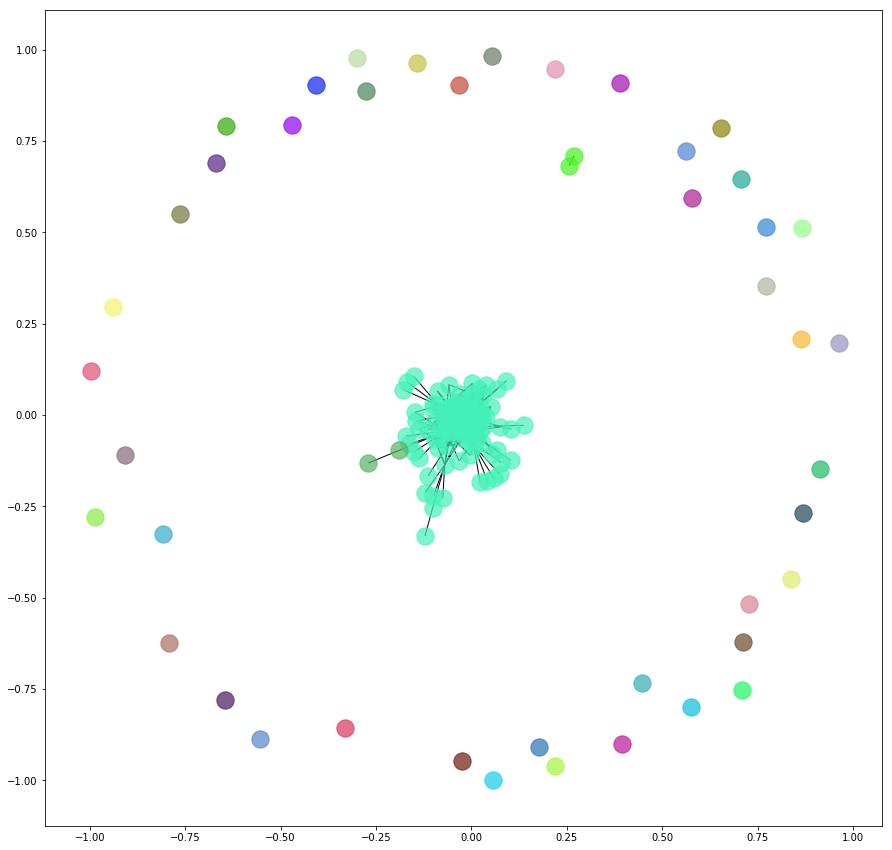

In [15]:
from matplotlib.pyplot import figure
import numpy

figure(figsize=(15,15))
pos = nx.spring_layout(G_sampled)
for community in list(communities_gn):
    nx.draw_networkx_nodes(G_sampled, pos=pos,
                           nodelist=community,
                           node_color=numpy.random.rand(3,),
                           alpha=0.7)
nx.draw_networkx_edges(G_sampled, pos=pos, edgelist=G_sampled.edges)

plt.show()

In [16]:
from networkx.algorithms.community.modularity_max import greedy_modularity_communities
communities_gmc = greedy_modularity_communities(G_sampled)

communities_sum = 0

for community_gmc in communities_gmc:
    communities_sum += 1
    print("Community ", communities_sum)
    print(community_gmc)
    print("Liczność community: ", len(community_gmc), "\n")
    
print("Znaleziono communities: ", communities_sum)

Community  1
frozenset({'ℂ𝕙𝕣𝕚𝕤𝕥𝕚𝕟𝕖💋', 'RW 😡', 'TRUMPERLAND🇺🇸', 'ＤａｒｋＧｒｅｙＧｈｏｓｔ🌹-K-', '🇺🇸 Miguelifornia', 'Fox News Research', 'The Columbia Bugle 🇺🇸', 'Girl♥️Bot', '#ThePersistence', 'Adrian Norman', 'Loomered❤️Molly⭐️⭐️⭐️', 'Տᗩᑎᗪᖇᗩ Vote Early GOP!!', 'DR. ETIQUETTE 🤦\u200d♂️', 'HISTORY', 'Barb🏇ÓRothláin', 'Julian Svendsen', '🇺🇸 SKY45 🇺🇸 ︻デ═一', 'JRehling', 'GRIZZ 🍺', 'DrLee MD is A NATIONALIST', 'Carrie 🇺🇸 Vote 🔴 Midterms', 'Bill Mitchell', 'Nationalist Drew 🇺🇸🏁🍻', '🇺🇸 Jayne Q. Nationalist ⭐️⭐️⭐️', 'Donald J. Trump', 'Sara', 'NTK Network', 'ɳαɳ૮ყ ن💄#VOTERed', '(((DeanObeidallah)))', 'Mike', 'Dr. Marty Fox', 'Catt', 'Nationalist🇺🇸T🇺🇸', 'Mark "Beto" Pantano', 'Deplorable Dan 🇺🇸', '🇺🇸Nationalist Lori🇺🇸 #WWG1WGA', 'Dr. Lynn J Anderson', 'Mike Tokes', 'Cali-Conservative🇺🇸'})
Liczność community:  39 

Community  2
frozenset({'ღReflectionsofJMღ ♨️ᶜᵒᶰˢᵉʳᵛᵃᵗᶦᵛᵉ', 'Alisande 🇺🇸', 'Robin 🇺🇸❤️🇺🇸', 'Heather Loesch', '🇺🇸🔥Lady De’Plorable🔥🇺🇸', '@gary[WontBackDown]', '🌟Patriotic Cindy🌟🚂🔴🐘🐘🇺🇸🇨🇱', 'Terri 

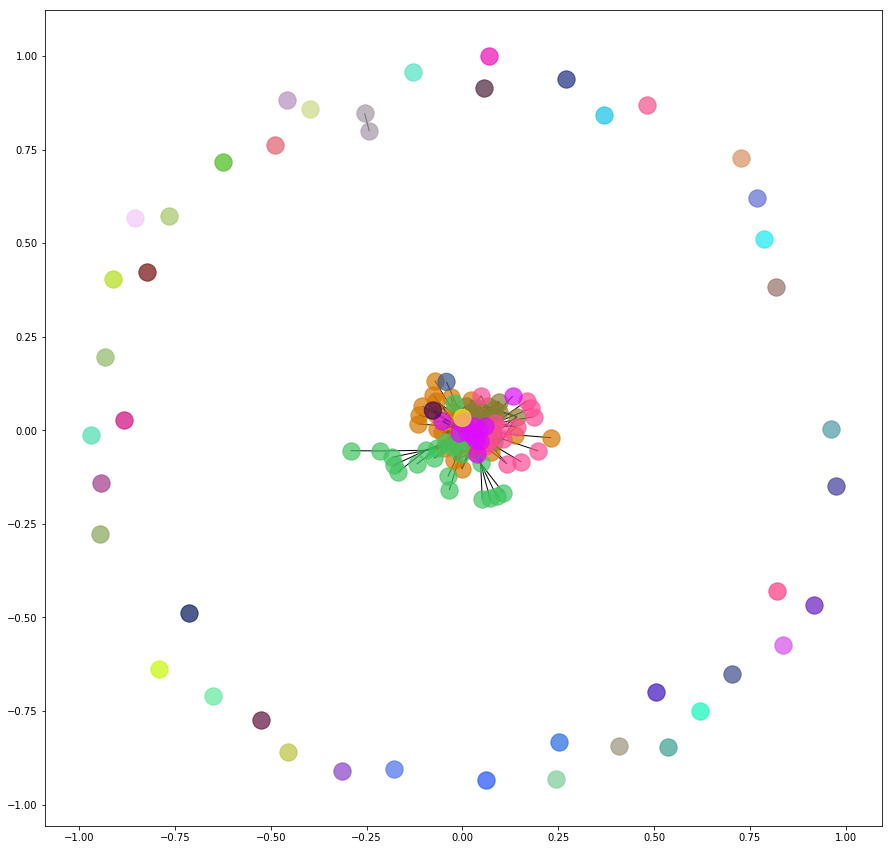

In [18]:
figure(figsize=(15,15))
pos = nx.spring_layout(G_sampled)
for community in communities_gmc:
    nx.draw_networkx_nodes(G_sampled, pos=pos,
                           nodelist=community,
                           node_color=numpy.random.rand(3,),
                           alpha=0.7)
nx.draw_networkx_edges(G_sampled, pos=pos, edgelist=G_sampled.edges)

plt.show()

In [19]:
sorted(G_sampled.degree, key=lambda x: x[1], reverse=True)[:10]


[('Mike', 45),
 ('Patriot Gary', 40),
 ('Cindyseestruth', 28),
 ('@gary[WontBackDown]', 27),
 ('Sektor (K)', 27),
 ('GRIZZ 🍺', 27),
 ('Kat  #ISTANDWITHGENFLYNN', 27),
 ('Black🕷Widow', 25),
 ('🇺🇸🔥Lady De’Plorable🔥🇺🇸', 25),
 ('Cody', 24)]

In [20]:
degree_centrality = sorted(nx.degree_centrality(G_sampled).items(), key=lambda x: x[1], reverse=True)

In [21]:
degree_centrality[:10]

[('Mike', 0.2777777777777778),
 ('Patriot Gary', 0.24691358024691357),
 ('Cindyseestruth', 0.1728395061728395),
 ('@gary[WontBackDown]', 0.16666666666666666),
 ('Sektor (K)', 0.16666666666666666),
 ('GRIZZ 🍺', 0.16666666666666666),
 ('Kat  #ISTANDWITHGENFLYNN', 0.16666666666666666),
 ('Black🕷Widow', 0.15432098765432098),
 ('🇺🇸🔥Lady De’Plorable🔥🇺🇸', 0.15432098765432098),
 ('Cody', 0.14814814814814814)]

In [22]:
betweenness_centrality = sorted(nx.betweenness_centrality(G_sampled).items(), key=lambda x: x[1], reverse=True)

In [23]:
betweenness_centrality[:10]

[('Mike', 0.10830767132580096),
 ('Patriot Gary', 0.05215366440575963),
 ('CC', 0.04430857792344042),
 ('Elaine', 0.03650106736847287),
 ('Save USA vote red ⭐️⭐️⭐️  🚂💨🇺🇸', 0.03269525765217544),
 ('TheKat ❤️', 0.027462322090482345),
 ('Cindyseestruth', 0.02706769235112128),
 ('Laura Vote Red', 0.021761094883740867),
 ('Cody', 0.02019185889102635),
 ('@gary[WontBackDown]', 0.01695049683737161)]

In [24]:
edge_betweenness_centrality = sorted(nx.edge_betweenness_centrality(G_sampled).items(), key=lambda x: x[1], reverse=True)

In [25]:
edge_betweenness_centrality[:10]

[(('CC', 'Patriot Gary'), 0.017697008496747945),
 (('Mike', 'Fox News Research'), 0.017571763993031887),
 (('CC', 'Kaz Weida'), 0.017571763993031887),
 (('CC', 'TheKat ❤️'), 0.011012191059175707),
 (('Mike', 'Elaine'), 0.010815485233923958),
 (('Ed Krassenstein', 'Elaine'), 0.008861622358554875),
 (('Lambda Legal', 'CC'), 0.008861622358554875),
 (('Donald J. Trump', 'Fox News Research'), 0.008861622358554875),
 (('🇺🇸California Condor🇺🇸', 'Jackie'), 0.008861622358554875),
 (('NTK Network', 'Mike'), 0.008861622358554875)]

In [26]:
from networkx.algorithms.community import k_clique_communities
cliques = list(k_clique_communities(G_sampled, 6))

In [27]:
for clique in cliques:
    print(len(clique))
    print(clique)

21
frozenset({'Cody', 'Sektor (K)', 'ღReflectionsofJMღ ♨️ᶜᵒᶰˢᵉʳᵛᵃᵗᶦᵛᵉ', 'Carrie 🇺🇸 Vote 🔴 Midterms', 'Robin 🇺🇸❤️🇺🇸', 'Nationalist Drew 🇺🇸🏁🍻', 'Dorcas↩', '🇺🇸🔥Lady De’Plorable🔥🇺🇸', 'Patriot Gary', '🇺🇸 Miguelifornia', '🐘🇺🇸 Kim 🇺🇸🐘', 'Girl♥️Bot', 'Chris  🇺🇸 Let Freedom Ring', '🌟Patriotic Cindy🌟🚂🔴🐘🐘🇺🇸🇨🇱', 'Mike', 'Arch Kennedy', 'Black🕷Widow', 'Deplorable Dan 🇺🇸', 'Anna❤Trump Nationalist🇺🇸🇮🇹', 'GRIZZ 🍺', 'Kat  #ISTANDWITHGENFLYNN'})
6
frozenset({'⭐️⭐️⭐️ @gsPatton007  🥊BEAT DEMS NOV 6🇺🇸', '⏳Ethan Allen⏳', 'ＤａｒｋＧｒｅｙＧｈｏｓｔ🌹-K-', 'RW 😡', '🇺🇸Nationalist Lori🇺🇸 #WWG1WGA', 'Patriot Gary'})
6
frozenset({'Nationalist🇺🇸T🇺🇸', '@gary[WontBackDown]', 'Chris  🇺🇸 Let Freedom Ring', 'RW 😡', 'Matthew', 'Patriot Gary'})
7
frozenset({'ღReflectionsofJMღ ♨️ᶜᵒᶰˢᵉʳᵛᵃᵗᶦᵛᵉ', 'Sektor (K)', 'Patriot Gary', '🇺🇸🔥Lady De’Plorable🔥🇺🇸', 'Nationalist🇺🇸T🇺🇸', '@gary[WontBackDown]', 'Chris  🇺🇸 Let Freedom Ring'})
6
frozenset({'Arch Kennedy', 'Jennifer 🔱🇺🇸🔱🌟🌟🌟', 'Kat  #ISTANDWITHGENFLYNN', 'TheKat ❤️', '🇺🇸🔥Lady De’Plorable🔥🇺🇸',

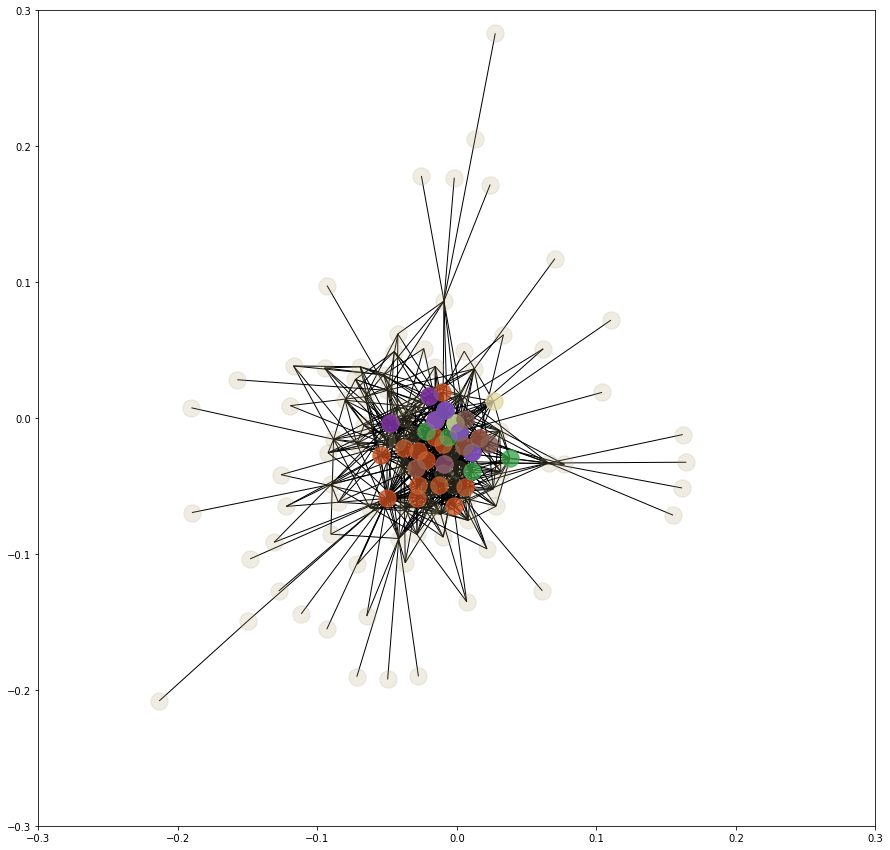

In [30]:
figure(figsize=(15,15))
pos = nx.spring_layout(G_sampled)
for clique in cliques:
    nx.draw_networkx_nodes(G_sampled, pos=pos,
                           nodelist=clique,
                           node_color=numpy.random.rand(3,),
                           alpha=0.7)
nx.draw_networkx_nodes(G_sampled, pos=pos,
                           nodelist=G_sampled.nodes,
                           node_color=numpy.random.rand(3,),
                           alpha=0.2)
nx.draw_networkx_edges(G_sampled, pos=pos, edgelist=G_sampled.edges)

plt.xlim(-0.3, 0.3)
plt.ylim(-0.3, 0.3)

plt.show()

In [31]:
# active users in distinct cliques

distinct_users_in_cliques = {}

for clique in cliques:
    for user in clique:
        if user in distinct_users_in_cliques:
            distinct_users_in_cliques[user] += 1
        else:
            distinct_users_in_cliques[user] = 1

In [32]:
top_users_in_cliques = sorted(distinct_users_in_cliques.items(), key=lambda x : x[1], reverse=True)
top_users_in_cliques[:5]

[('Patriot Gary', 4),
 ('🇺🇸🔥Lady De’Plorable🔥🇺🇸', 3),
 ('Chris  🇺🇸 Let Freedom Ring', 3),
 ('Sektor (K)', 2),
 ('ღReflectionsofJMღ ♨️ᶜᵒᶰˢᵉʳᵛᵃᵗᶦᵛᵉ', 2)]

In [38]:
### Get Vader for this users
user = top_users_in_cliques[10]
users = pd.read_sql_query('SELECT user.user_id AS id, user.user_name, tweet.tweet_id, vader.compound as vader_mood \
                            FROM user \
                             JOIN tweet ON tweet.user_id = user.user_id \
                             JOIN vader ON tweet.tweet_id = vader.id \
                             WHERE user.user_name = "' + user[0] + '"', engine)
users

,id,user_name,tweet_id,vader_mood
0,167778891,@gary[WontBackDown],1061447726301204480,0.8176
1,167778891,@gary[WontBackDown],1061468837327986688,-0.0644
2,167778891,@gary[WontBackDown],1061510619222798336,0.0000
